In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

plt.style.use('ggplot')
import dateutil.parser
import re
import time

%matplotlib inline
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
datestring = time.strftime("%m-%h-%d")
datestring

'07-Jul-24'

In [4]:
#Reading in the csv's:
df_SL_transfers = pd.read_csv('SL_transfers.csv')
df_SL_transfers.head()

,Agent,Alter,Ausrüster,Gelb-Rote Karten,Gelbe Karten,Grösse,Im Team seit,Marktwert,Minuten,Name,Position,Rote Karten,Tore,Total Spiele,URL,Verein,Vorlagen,Wechsel von,*Wechsel von*,*Verein*
0,Footuro AG,21,Nike Nike Magista Obra II,0,3,NaN,11.01.2018,6000000.0,<function Minuten at 0x1153ad950>,D. Nikolic,Torwart,0,0,45,http://www.transfermarkt.ch/djordje-nikolic/pr...,FC Thun,0,FC Basel 1893,FC Basel,FC Thun
1,ESHA,20,NaN,0,6,NaN,15.01.2018,5000000.0,<function Minuten at 0x1153ad950>,D. Schmid,Mittelfeld - Offensives Mittelfeld,0,11,84,http://www.transfermarkt.ch/dominik-schmid/pro...,FC Lausanne-Sport,1,FC Basel 1893,FC Basel,FC Lausanne-Sport
2,Sportfront GmbH,24,Nike Nike Magista Obra II,0,6,NaN,05.07.2018,6500000.0,<function Minuten at 0x1153ad950>,M. Salvi,Torwart,0,0,150,http://www.transfermarkt.ch/mirko-salvi/profil...,FC Luzern,0,Grasshopper Club Zürich,Grasshopper Club Zürich,FC Luzern
3,Gol de Classe,21,NaN,0,25,NaN,26.02.2018,3000000.0,<function Minuten at 0x1153ad950>,P. Pacheco,Abwehr - Innenverteidiger,1,3,90,http://www.transfermarkt.ch/pedro-pacheco/prof...,FC Rapperswil-Jona,1,FC Basel 1893,FC Basel,FC Rapperswil-Jona
4,Sportfront GmbH,23,NaN,0,13,NaN,22.06.2018,5000000.0,<function Minuten at 0x1153ad950>,R. Kapic,Mittelfeld - Zentrales Mittelfeld,0,18,84,http://www.transfermarkt.ch/rifet-kapic/profil...,Sheriff Tiraspol,5,Grasshopper Club Zürich,Grasshopper Club Zürich,Sheriff Tiraspol


In [10]:
df_SL_Vereine = pd.read_csv("Super_League_Vereine_18_19.csv")
df_SL_Vereine.head()

,SL-Verein,Group 1,Group 2
0,FC Basel,FCB,FCB
1,FC Sion,Sion,Rest
2,FC Lugano,Lugano,Rest
3,FC Lausanne-Sport,Rest,Rest
4,BSC Young Boys,Rest,Rest


In [12]:
#Merging the Files
df_SL_Zuzuege = df_SL_transfers.merge(df_SL_Vereine, left_on = '*Verein*', right_on ='SL-Verein') 
df_SL_Zuzuege.head()

,Agent,Alter,Ausrüster,Gelb-Rote Karten,Gelbe Karten,Grösse,Im Team seit,Marktwert,Minuten,Name,...,Total Spiele,URL,Verein,Vorlagen,Wechsel von,*Wechsel von*,*Verein*,SL-Verein,Group 1,Group 2
0,Footuro AG,21,Nike Nike Magista Obra II,0,3,NaN,11.01.2018,6000000.0,<function Minuten at 0x1153ad950>,D. Nikolic,...,45,http://www.transfermarkt.ch/djordje-nikolic/pr...,FC Thun,0,FC Basel 1893,FC Basel,FC Thun,FC Thun,Rest,Rest
1,IFM,22,Nike Nike Mercurial Superfly 360,0,5,NaN,01.07.2017,6000000.0,<function Minuten at 0x1153ad950>,N. Hunziker,...,108,http://www.transfermarkt.ch/nicolas-hunziker/p...,FC Thun,4,FC Basel,FC Basel,FC Thun,FC Thun,Rest,Rest
2,IFM,23,,0,10,NaN,01.07.2018,8000000.0,<function Minuten at 0x1153ad950>,G. Karlen,...,132,http://www.transfermarkt.ch/gregory-karlen/pro...,FC Thun,10,FC Sion,FC Sion,FC Thun,FC Thun,Rest,Rest
3,IFM,23,Nike Nike Hypervenom Phantom III,0,18,NaN,11.07.2017,1250000.0,<function Minuten at 0x1153ad950>,Roy Gelmi,...,134,http://www.transfermarkt.ch/roy-gelmi/profil/s...,FC Thun,1,FC St. Gallen,FC St. Gallen 1879,FC Thun,FC Thun,Rest,Rest
4,ohne Berater,24,NaN,0,17,NaN,01.07.2017,4000000.0,<function Minuten at 0x1153ad950>,N. Da Silva,...,160,http://www.transfermarkt.ch/nuno-da-silva/prof...,FC Thun,27,FC Breitenrain,FC Breitenrain,FC Thun,FC Thun,Rest,Rest


In [13]:
df_SL_Abgaenge = df_SL_transfers.merge(df_SL_Vereine, left_on = '*Wechsel von*', right_on ='SL-Verein')
df_SL_Abgaenge.head()

,Agent,Alter,Ausrüster,Gelb-Rote Karten,Gelbe Karten,Grösse,Im Team seit,Marktwert,Minuten,Name,...,Total Spiele,URL,Verein,Vorlagen,Wechsel von,*Wechsel von*,*Verein*,SL-Verein,Group 1,Group 2
0,Footuro AG,21,Nike Nike Magista Obra II,0,3,NaN,11.01.2018,6000000.0,<function Minuten at 0x1153ad950>,D. Nikolic,...,45,http://www.transfermarkt.ch/djordje-nikolic/pr...,FC Thun,0,FC Basel 1893,FC Basel,FC Thun,FC Basel,FCB,FCB
1,ESHA,20,NaN,0,6,NaN,15.01.2018,5000000.0,<function Minuten at 0x1153ad950>,D. Schmid,...,84,http://www.transfermarkt.ch/dominik-schmid/pro...,FC Lausanne-Sport,1,FC Basel 1893,FC Basel,FC Lausanne-Sport,FC Basel,FCB,FCB
2,Gol de Classe,21,NaN,0,25,NaN,26.02.2018,3000000.0,<function Minuten at 0x1153ad950>,P. Pacheco,...,90,http://www.transfermarkt.ch/pedro-pacheco/prof...,FC Rapperswil-Jona,1,FC Basel 1893,FC Basel,FC Rapperswil-Jona,FC Basel,FCB,FCB
3,NaN,26,Nike Nike Magista Obra II,2,48,NaN,31.08.2016,2500000.0,<function Minuten at 0x1153ad950>,L. Lacroix,...,191,http://www.transfermarkt.ch/leo-lacroix/profil...,AS Saint-Étienne,2,FC Basel,FC Basel,AS Saint-Étienne,FC Basel,FCB,FCB
4,AR Sport Management,24,Nike Nike Mercurial Superfly 360,0,20,NaN,03.01.2018,7500000.0,<function Minuten at 0x1153ad950>,A. Sporar,...,187,http://www.transfermarkt.ch/andraz-sporar/prof...,Slovan Bratislava,26,FC Basel,FC Basel,Slovan Bratislava,FC Basel,FCB,FCB


In [14]:
#Working out total market values of bought players
Total_Marktwert_Zuzuege = pd.DataFrame(df_SL_Zuzuege.groupby('*Verein*')['Marktwert'].sum())
Total_Marktwert_Zuzuege.head(3)

,Marktwert
*Verein*,
BSC Young Boys,63500000.0
FC Basel,38000000.0
FC Lausanne-Sport,42750000.0


In [15]:
#Working out total market values of sold players
Total_Marktwert_Abgaenge = pd.DataFrame(df_SL_Abgaenge.groupby('*Wechsel von*')['Marktwert'].sum())
Total_Marktwert_Abgaenge.head(3)

,Marktwert
*Wechsel von*,
BSC Young Boys,70750000.0
FC Basel,52250000.0
FC Lausanne-Sport,34250000.0


In [6]:
df_bilanz = pd.read_csv('transferbilanz_cleaned_SL.csv')
df_bilanz.head()

,verein,total_marktwert_zuzuege,total_marktwert_abgaenge,differenz_marktwert,total_tore_zuzuege,total_tore_abgaenge,tore_differenz,total_vorlagen_zuzuege,total_vorlagen_abgaenge,vorlagen-differenz,total_spiele_zuzuege,total_spiele_abgaenge,total-spiel-differenz
0,BSC Young Boys,63500000.0,70750000.0,-7250000.0,234,380,-146,119,257,-138,1283,2432,-1149
1,FC Basel,38000000.0,52250000.0,-14250000.0,552,441,111,258,262,-4,2126,2607,-481
2,FC Lausanne-Sport,42750000.0,34250000.0,8500000.0,255,424,-169,79,279,-200,1594,3216,-1622
3,FC Lugano,76750000.0,34750000.0,42000000.0,502,242,260,191,170,21,2926,3052,-126
4,FC Luzern,36750000.0,35500000.0,1250000.0,176,241,-65,134,117,17,1922,2644,-722


In [33]:
df_SL_Zuzuege.head()

,Agent,Alter,Ausrüster,Gelb-Rote Karten,Gelbe Karten,Grösse,Im Team seit,Marktwert,Minuten,Name,...,Total Spiele,URL,Verein,Vorlagen,Wechsel von,*Wechsel von*,*Verein*,SL-Verein,Group 1,Group 2
0,Footuro AG,21,Nike Nike Magista Obra II,0,3,NaN,11.01.2018,6000000.0,<function Minuten at 0x1153ad950>,D. Nikolic,...,45,http://www.transfermarkt.ch/djordje-nikolic/pr...,FC Thun,0,FC Basel 1893,FC Basel,FC Thun,FC Thun,Rest,Rest
1,IFM,22,Nike Nike Mercurial Superfly 360,0,5,NaN,01.07.2017,6000000.0,<function Minuten at 0x1153ad950>,N. Hunziker,...,108,http://www.transfermarkt.ch/nicolas-hunziker/p...,FC Thun,4,FC Basel,FC Basel,FC Thun,FC Thun,Rest,Rest
2,IFM,23,,0,10,NaN,01.07.2018,8000000.0,<function Minuten at 0x1153ad950>,G. Karlen,...,132,http://www.transfermarkt.ch/gregory-karlen/pro...,FC Thun,10,FC Sion,FC Sion,FC Thun,FC Thun,Rest,Rest
3,IFM,23,Nike Nike Hypervenom Phantom III,0,18,NaN,11.07.2017,1250000.0,<function Minuten at 0x1153ad950>,Roy Gelmi,...,134,http://www.transfermarkt.ch/roy-gelmi/profil/s...,FC Thun,1,FC St. Gallen,FC St. Gallen 1879,FC Thun,FC Thun,Rest,Rest
4,ohne Berater,24,NaN,0,17,NaN,01.07.2017,4000000.0,<function Minuten at 0x1153ad950>,N. Da Silva,...,160,http://www.transfermarkt.ch/nuno-da-silva/prof...,FC Thun,27,FC Breitenrain,FC Breitenrain,FC Thun,FC Thun,Rest,Rest


# Plotting

### Most active Player Agents

0
Rectangle(xy=(0, -0.25), width=4, height=0.5, angle=0)
1
Rectangle(xy=(0, 0.75), width=5, height=0.5, angle=0)
2
Rectangle(xy=(0, 1.75), width=6, height=0.5, angle=0)
3
Rectangle(xy=(0, 2.75), width=6, height=0.5, angle=0)
4
Rectangle(xy=(0, 3.75), width=7, height=0.5, angle=0)
5
Rectangle(xy=(0, 4.75), width=9, height=0.5, angle=0)
6
Rectangle(xy=(0, 5.75), width=10, height=0.5, angle=0)
7
Rectangle(xy=(0, 6.75), width=12, height=0.5, angle=0)
8
Rectangle(xy=(0, 7.75), width=14, height=0.5, angle=0)
9
Rectangle(xy=(0, 8.75), width=15, height=0.5, angle=0)


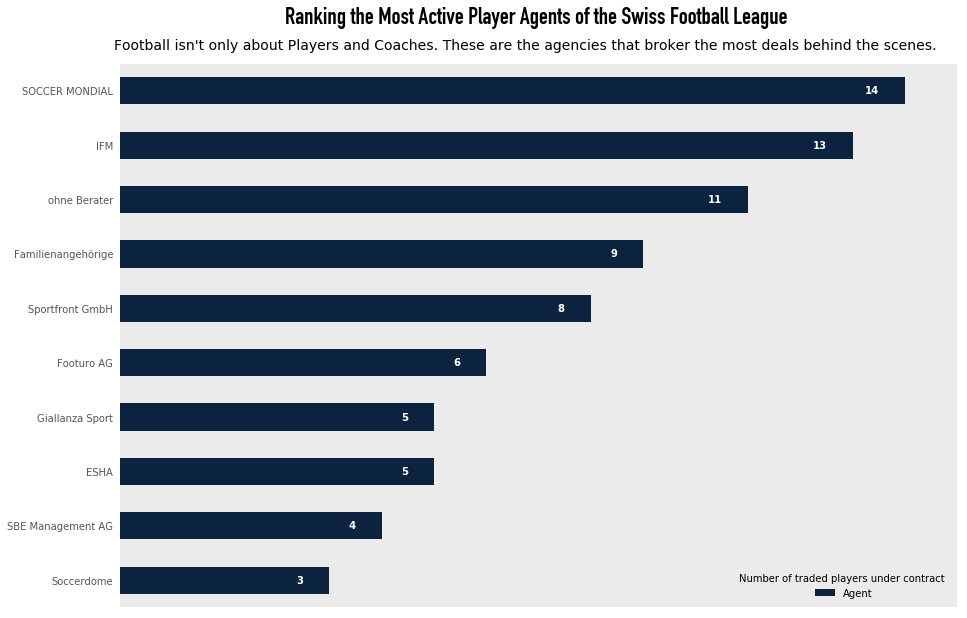

In [8]:
fig, ax = plt.subplots(figsize =(15,10))

#Font
csfont = {'fontname':'DIN Condensed'}

df_SL_transfers['Agent'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh', color= "#0C2340")

ax.set_facecolor("#EBEBEB")

ax.xaxis.grid(color='white', linestyle=':', linewidth=1)


ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.tick_params(
    #axis='x',
    top=False,
    which=False,
    left=False,
    right=False,
    bottom=False,
    labeltop=False,
    labelbottom=False)

#Labels and title and subtitle
#ax.set_xlabel('Traded players under contract', **csfont, fontsize=12)
ax.set_title("Ranking the Most Active Player Agents of the Swiss Football League ", **csfont, pad=40, fontsize=24)

plt.gcf().text(0.5, 0.9, "Football isn't only about Players and Coaches. These are the agencies that broker the most deals behind the scenes.", ha="center", fontsize=14)

ax.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16])
ax.set_xticklabels(["", 2, 4, 6, 8, 10, 12, 14, 16])

# xticks & yticks have empty lists to reduce white space in plot
ax.grid(False)

ax.tick_params(left=False)
plt.xticks([])


#plt.yticks([])
#plt.tight_layout()

#Bars free:
for i, bar in enumerate(ax.patches):
    print(i)
    print(bar)
    
    #Now numbers inside of bars
    value = bar.get_width() -1
    x_pos = bar.get_width() -0.5
    y_pos = i
    ax.text(x_pos, y_pos, round(value,1), va='center', ha = "right", color="white", fontweight="bold")
    
#Legend   
ax.legend(loc='lower right', title='Number of traded players under contract ', frameon=False)


#Saving
plt.savefig('Agents_bars_free.pdf', transparent=True, bbox_inches='tight')
plt.savefig('Agents_bars_free.png', transparent=True, bbox_inches='tight')

In [17]:
##Safing the dataframe in a new one and making the club name also the Index, useful when making the graphs
df_bilanz_new = df_bilanz
df_bilanz_new

,verein,total_marktwert_zuzuege,total_marktwert_abgaenge,differenz_marktwert,total_tore_zuzuege,total_tore_abgaenge,tore_differenz,total_vorlagen_zuzuege,total_vorlagen_abgaenge,vorlagen-differenz,total_spiele_zuzuege,total_spiele_abgaenge,total-spiel-differenz
0,BSC Young Boys,63500000.0,70750000.0,-7250000.0,234,380,-146,119,257,-138,1283,2432,-1149
1,FC Basel,38000000.0,52250000.0,-14250000.0,552,441,111,258,262,-4,2126,2607,-481
2,FC Lausanne-Sport,42750000.0,34250000.0,8500000.0,255,424,-169,79,279,-200,1594,3216,-1622
3,FC Lugano,76750000.0,34750000.0,42000000.0,502,242,260,191,170,21,2926,3052,-126
4,FC Luzern,36750000.0,35500000.0,1250000.0,176,241,-65,134,117,17,1922,2644,-722
5,FC Sion,42350000.0,85750000.0,-43400000.0,172,579,-407,104,314,-210,1763,3548,-1785
6,FC St. Gallen 1879,43250000.0,40000000.0,3250000.0,229,265,-36,149,153,-4,1976,1994,-18
7,FC Thun,51250000.0,24000000.0,27250000.0,235,263,-28,128,80,48,1471,1494,-23
8,FC Zürich,29000000.0,40000000.0,-11000000.0,130,253,-123,84,215,-131,1099,3159,-2060
9,Grasshopper Club Zürich,54000000.0,49850000.0,4150000.0,388,498,-110,169,166,3,2284,2506,-222


In [18]:
#Using Clubs as index:
df_bilanz_new.index = df_bilanz_new['verein']

In [19]:
from matplotlib.ticker import FuncFormatter

#Step 1: Build a function
def with_words(value, pos):
    millions = int(value/1000000)
   # print(pos)
    return "{} million".format(int(millions))

def with_commas(value, pos):
    return "{:,}".format(int(value))

#Step 2: Use FuncFormatter with that function
formatter = FuncFormatter(with_commas)

### Differenz der Spielermarktwerte 

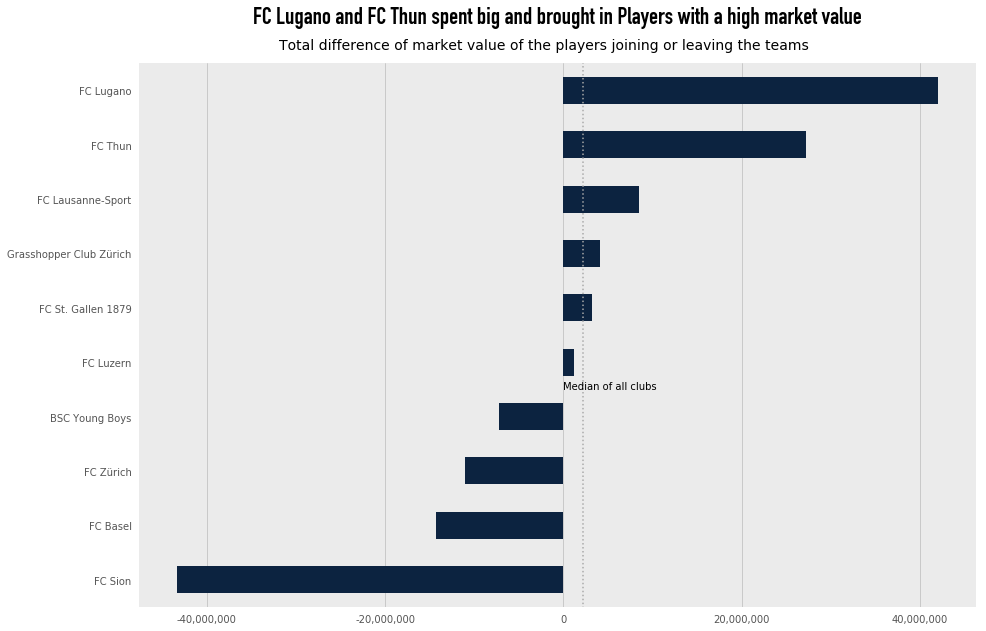

In [20]:
fig, ax = plt.subplots(figsize =(15,10))

#Font
csfont = {'fontname':'DIN Condensed'}

df_bilanz_new['differenz_marktwert'].sort_values().plot(kind='barh', ax = ax, legend=False, color=['#0C2340'])
plt.axes

ax.set_facecolor("#EBEBEB")


#grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='darkgrey')
#Getting rid of the ax.y
ax.grid(False, axis='y')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


#Labels and title
ax.set_title("FC Lugano and FC Thun spent big and brought in Players with a high market value", **csfont, pad=40, fontsize=24)
plt.gcf().text(0.5, 0.9, "Total difference of market value of the players joining or leaving the teams", ha="center", fontsize=14)
ax.set_ylabel('')

#Ticks
ax.tick_params(left=False)
ax.tick_params(bottom=False)

#Showing Median
median = df_bilanz_new['differenz_marktwert'].median()
ax.plot([median, median], [-4, 10], c='darkgrey', linestyle=':')
ax.annotate(s='Median of all clubs', xy=(4000,3.5), color='black')

#Formatting x-labels 
#Step 1: Build a function
def with_words(value, pos):
    millions = int(value/1000000)
   # print(pos)
    return "{} million".format(int(millions))

def with_commas(value, pos):
    return "{:,}".format(int(value))

#Step 2: Use FuncFormatter with that function
formatter = FuncFormatter(with_commas)
ax.set_axisbelow(True)

ax.xaxis.set_major_formatter(formatter)

plt.savefig('Marktwerte.pdf', transparent=True, bbox_inches='tight')
plt.savefig('Marktwerte.png', transparent=True, bbox_inches='tight')



### Experience

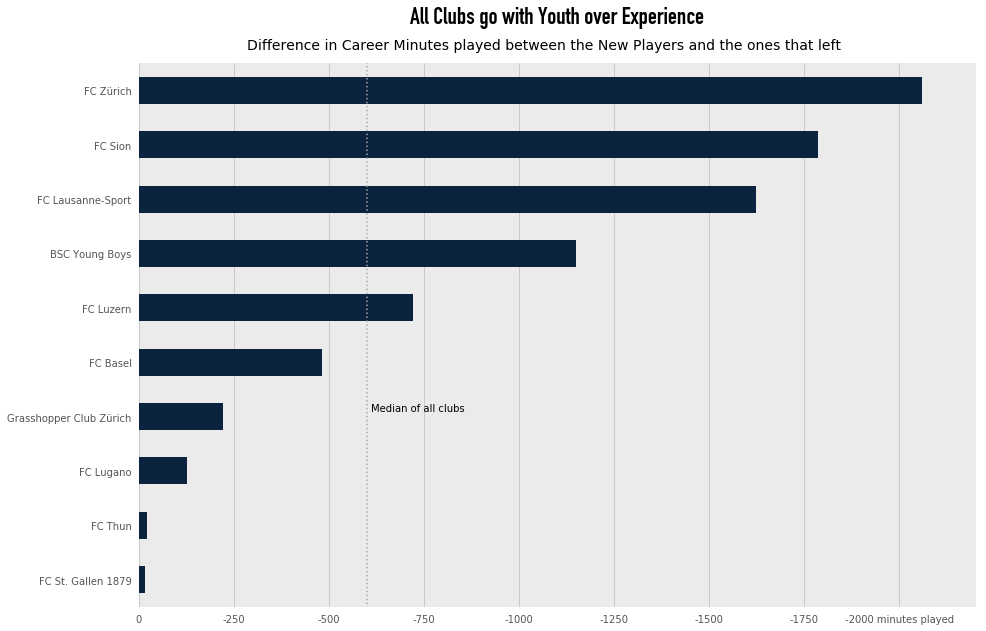

In [21]:
fig, ax = plt.subplots(figsize =(15,10))

#Font
csfont = {'fontname':'DIN Condensed'}

df_bilanz_new['total-spiel-differenz'].sort_values(ascending=False).plot(kind='barh', legend=False, ax = ax, color=['#0C2340'])
plt.axes

ax.set_facecolor("#EBEBEB")

ax.set_ylabel('')


#grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='darkgrey')
#Getting rid of the ax.y
ax.grid(False, axis='y')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


#Changing the lims of the bars (from right to left) to (left to right)
plt.xlim([ 0,-2200])


#Ticks
ax.tick_params(left=False)
ax.tick_params(bottom=False)
ax.set_xticks([0, -250, -500, -750, -1000, -1250, -1500, -1750, -2000])
ax.set_xticklabels([0, -250, -500, -750, -1000, -1250, -1500, -1750, "-2000 minutes played"])

#Title
ax.set_title("All Clubs go with Youth over Experience", **csfont, pad=40, fontsize=24)
plt.gcf().text(0.5, 0.9, "Difference in Career Minutes played between the New Players and the ones that left", ha="center", fontsize=14)

#Showing Median
median = df_bilanz_new['total-spiel-differenz'].median()
ax.plot([median, median], [-4, 10], c='darkgrey', linestyle=':')
ax.annotate(s='Median of all clubs', xy=(-610,3.1), color='black')

ax.set_axisbelow(True)
plt.savefig('experience.pdf', transparent=True, bbox_inches='tight')
plt.savefig('experience.png', transparent=True, bbox_inches='tight')

### Goal ratio (Goals compared to market value) 

In [22]:
df_SL_transfers['tor_ratio'] = df_SL_transfers.Tore / df_SL_transfers['Total Spiele']
df_SL_transfers.sort_values('tor_ratio', ascending=False).head(10)

,Agent,Alter,Ausrüster,Gelb-Rote Karten,Gelbe Karten,Grösse,Im Team seit,Marktwert,Minuten,Name,...,Rote Karten,Tore,Total Spiele,URL,Verein,Vorlagen,Wechsel von,*Wechsel von*,*Verein*,tor_ratio
194,Atalentis,20,Nike Nike Hypervenom Phantom III,1,7,NaN,01.07.2017,7000000.0,<function Minuten at 0x1153ad950>,A. Pinga,...,0,50,83,http://www.transfermarkt.ch/aimery-pinga/profi...,FC Sion,2,FC Sion U21,FC Sion U21,FC Sion,0.602410
50,Universal Management SA,30,NaN,2,29,NaN,01.01.2018,3500000.0,<function Minuten at 0x1153ad950>,S. Doumbia,...,0,194,345,http://www.transfermarkt.ch/seydou-doumbia/pro...,Sporting Lissabon,61,AS Rom,AS Rom,Sporting Lissabon,0.562319
33,REAL PRO Football Consultant,19,NaN,0,13,NaN,01.07.2017,3000000.0,<function Minuten at 0x1153ad950>,A. Pululu,...,0,34,68,http://www.transfermarkt.ch/afimico-pululu/pro...,FC Basel 1893,3,FC Basel U21,FC Basel U21,FC Basel,0.500000
43,Wasserman Netherlands,35,NaN,2,72,NaN,06.02.2018,5000000.0,<function Minuten at 0x1153ad950>,M. Janko,...,2,213,428,http://www.transfermarkt.ch/marc-janko/profil/...,FC Lugano,43,Sparta Prag,Sparta Prag,FC Lugano,0.497664
276,arena11 sports group,21,Nike Nike Mercurial Superfly 360,0,12,NaN,30.01.2018,2000000.0,<function Minuten at 0x1153ad950>,M. Koné,...,0,34,73,http://www.transfermarkt.ch/moussa-kone/profil...,SG Dynamo Dresden,8,FC Zürich,FC Zürich,SG Dynamo Dresden,0.465753
65,FPA Fairplay Agency Ltd,22,,0,23,NaN,01.07.2018,4000000.0,<function Minuten at 0x1153ad950>,V. Fazliu,...,1,55,121,http://www.transfermarkt.ch/valon-fazliu/profi...,FC Lugano,9,Grasshoppers,Grasshopper Club Zürich,FC Lugano,0.454545
149,LIAN SPORTS,27,Nike Nike Mercurial Superfly 360,2,31,NaN,31.01.2018,8000000.0,<function Minuten at 0x1153ad950>,A. Sadiku,...,1,119,263,http://www.transfermarkt.ch/armando-sadiku/pro...,UD Levante,22,Legia Warschau,Legia Warschau,UD Levante,0.452471
121,BSA srl,20,NaN,0,6,NaN,25.07.2017,2000000.0,<function Minuten at 0x1153ad950>,C. Manicone,...,1,41,92,http://www.transfermarkt.ch/carlo-manicone/pro...,FC Lugano,5,Empoli U19,Empoli U19,FC Lugano,0.445652
82,SOCCER MONDIAL,26,Nike Nike Mercurial Superfly 360,1,45,NaN,01.07.2016,NaN,<function Minuten at 0x1153ad950>,M. Dabbur,...,0,114,263,http://www.transfermarkt.ch/munas-dabbur/profi...,Red Bull Salzburg,52,Grasshoppers,Grasshopper Club Zürich,Red Bull Salzburg,0.433460
63,SEG,25,,0,49,NaN,01.07.2018,7500000.0,<function Minuten at 0x1153ad950>,M. Djuricin,...,0,109,252,http://www.transfermarkt.ch/marco-djuricin/pro...,Grasshopper Club Zürich,28,RB Salzburg,RB Salzburg,Grasshopper Club Zürich,0.432540


In [23]:
goalscorer = df_SL_transfers[df_SL_transfers.Position.str.contains('Sturm' or 'Mittelfeld')]
goalscorer.head()

,Agent,Alter,Ausrüster,Gelb-Rote Karten,Gelbe Karten,Grösse,Im Team seit,Marktwert,Minuten,Name,...,Rote Karten,Tore,Total Spiele,URL,Verein,Vorlagen,Wechsel von,*Wechsel von*,*Verein*,tor_ratio
7,NaN,22,,1,7,NaN,29.01.2018,2000000.0,<function Minuten at 0x1153ad950>,Y. Bnou Marzouk,...,0,36,101,http://www.transfermarkt.ch/younes-bnou-marzou...,Dalkurd FF,5,FC Lugano,FC Lugano,Dalkurd FF,0.356436
15,ohne Berater,20,Nike Nike Mercurial Superfly 360,0,11,NaN,16.03.2018,4000000.0,<function Minuten at 0x1153ad950>,B. Babic,...,1,40,110,http://www.transfermarkt.ch/boris-babic/profil...,FC Vaduz,4,FC St. Gallen 1879,FC St. Gallen 1879 1879,FC Vaduz,0.363636
17,Familienangehörige,22,,0,18,NaN,12.01.2018,2500000.0,<function Minuten at 0x1153ad950>,M. Dangubic,...,0,41,96,http://www.transfermarkt.ch/marko-dangubic/pro...,FC Köniz,1,BSC Young Boys,BSC Young Boys,FC Köniz,0.427083
22,Louis Laros,29,NaN,1,37,NaN,01.07.2017,3000000.0,<function Minuten at 0x1153ad950>,R. van Wolfswinkel,...,0,138,354,http://www.transfermarkt.ch/ricky-van-wolfswin...,FC Basel 1893,28,Vitesse Arnheim,Vitesse Arnheim,FC Basel,0.389831
24,ESHA,21,Nike Nike Mercurial Superfly 360,0,17,NaN,02.10.2017,5000000.0,<function Minuten at 0x1153ad950>,A. Ajeti,...,0,64,172,http://www.transfermarkt.ch/albian-ajeti/profi...,FC Basel 1893,16,FC St. Gallen,FC St. Gallen 1879,FC Basel,0.372093


In [24]:
goalscorer.sort_values('tor_ratio', ascending=False)

,Agent,Alter,Ausrüster,Gelb-Rote Karten,Gelbe Karten,Grösse,Im Team seit,Marktwert,Minuten,Name,...,Rote Karten,Tore,Total Spiele,URL,Verein,Vorlagen,Wechsel von,*Wechsel von*,*Verein*,tor_ratio
194,Atalentis,20,Nike Nike Hypervenom Phantom III,1,7,NaN,01.07.2017,7000000.0,<function Minuten at 0x1153ad950>,A. Pinga,...,0,50,83,http://www.transfermarkt.ch/aimery-pinga/profi...,FC Sion,2,FC Sion U21,FC Sion U21,FC Sion,0.602410
50,Universal Management SA,30,NaN,2,29,NaN,01.01.2018,3500000.0,<function Minuten at 0x1153ad950>,S. Doumbia,...,0,194,345,http://www.transfermarkt.ch/seydou-doumbia/pro...,Sporting Lissabon,61,AS Rom,AS Rom,Sporting Lissabon,0.562319
33,REAL PRO Football Consultant,19,NaN,0,13,NaN,01.07.2017,3000000.0,<function Minuten at 0x1153ad950>,A. Pululu,...,0,34,68,http://www.transfermarkt.ch/afimico-pululu/pro...,FC Basel 1893,3,FC Basel U21,FC Basel U21,FC Basel,0.500000
43,Wasserman Netherlands,35,NaN,2,72,NaN,06.02.2018,5000000.0,<function Minuten at 0x1153ad950>,M. Janko,...,2,213,428,http://www.transfermarkt.ch/marc-janko/profil/...,FC Lugano,43,Sparta Prag,Sparta Prag,FC Lugano,0.497664
276,arena11 sports group,21,Nike Nike Mercurial Superfly 360,0,12,NaN,30.01.2018,2000000.0,<function Minuten at 0x1153ad950>,M. Koné,...,0,34,73,http://www.transfermarkt.ch/moussa-kone/profil...,SG Dynamo Dresden,8,FC Zürich,FC Zürich,SG Dynamo Dresden,0.465753
149,LIAN SPORTS,27,Nike Nike Mercurial Superfly 360,2,31,NaN,31.01.2018,8000000.0,<function Minuten at 0x1153ad950>,A. Sadiku,...,1,119,263,http://www.transfermarkt.ch/armando-sadiku/pro...,UD Levante,22,Legia Warschau,Legia Warschau,UD Levante,0.452471
121,BSA srl,20,NaN,0,6,NaN,25.07.2017,2000000.0,<function Minuten at 0x1153ad950>,C. Manicone,...,1,41,92,http://www.transfermarkt.ch/carlo-manicone/pro...,FC Lugano,5,Empoli U19,Empoli U19,FC Lugano,0.445652
82,SOCCER MONDIAL,26,Nike Nike Mercurial Superfly 360,1,45,NaN,01.07.2016,NaN,<function Minuten at 0x1153ad950>,M. Dabbur,...,0,114,263,http://www.transfermarkt.ch/munas-dabbur/profi...,Red Bull Salzburg,52,Grasshoppers,Grasshopper Club Zürich,Red Bull Salzburg,0.433460
63,SEG,25,,0,49,NaN,01.07.2018,7500000.0,<function Minuten at 0x1153ad950>,M. Djuricin,...,0,109,252,http://www.transfermarkt.ch/marco-djuricin/pro...,Grasshopper Club Zürich,28,RB Salzburg,RB Salzburg,Grasshopper Club Zürich,0.432540
17,Familienangehörige,22,,0,18,NaN,12.01.2018,2500000.0,<function Minuten at 0x1153ad950>,M. Dangubic,...,0,41,96,http://www.transfermarkt.ch/marko-dangubic/pro...,FC Köniz,1,BSC Young Boys,BSC Young Boys,FC Köniz,0.427083


In [28]:
import numpy as np

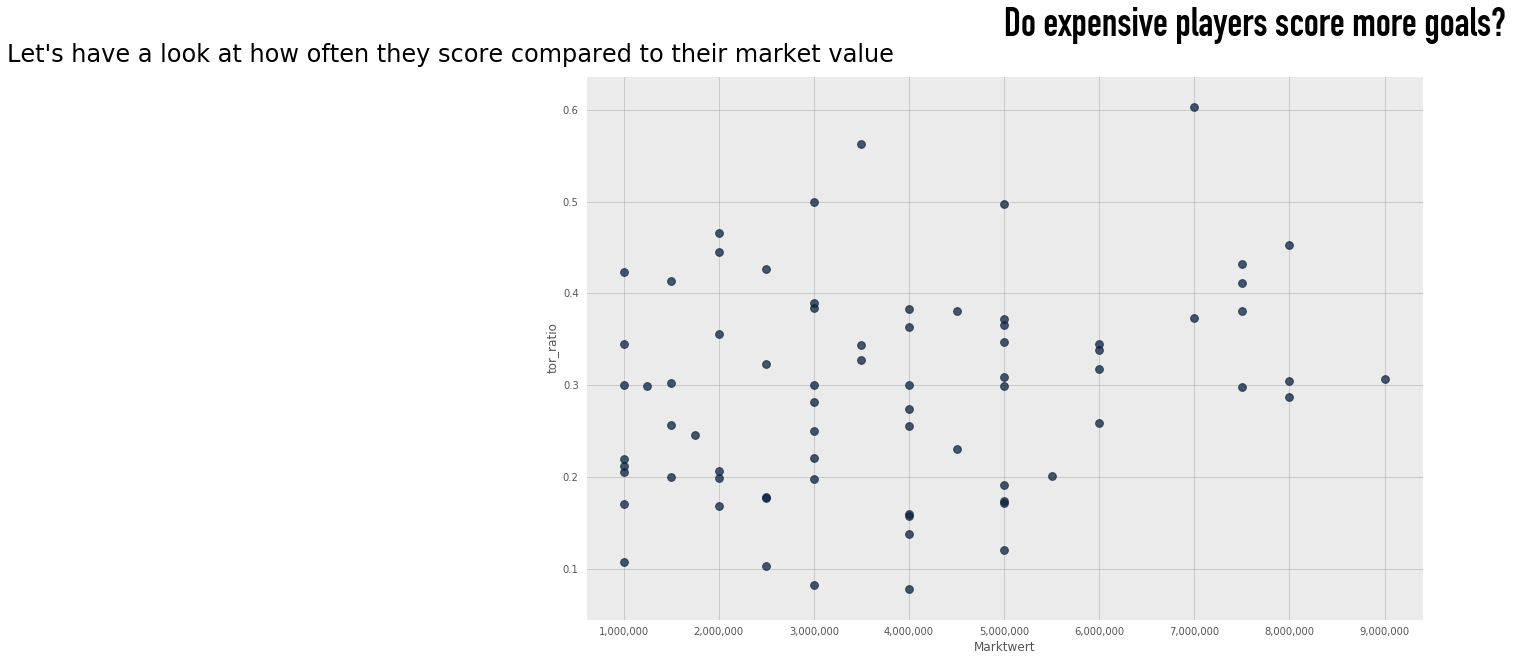

In [47]:
fig, ax = plt.subplots(figsize =(15,10))

#Font
csfont = {'fontname':'DIN Condensed'}

goalscorer.plot(x='Marktwert', y='tor_ratio', kind='scatter', ax = ax, color=['#0C2340'], s=60, linewidths=1, alpha=0.75)
plt.axes

ax.set_facecolor("#EBEBEB")

#grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='darkgrey')
#Getting rid of the ax.y
ax.grid(True, axis='y', color='darkgrey')

#Ticks
ax.tick_params(left=False)
ax.tick_params(bottom=False)

#Title
ax.set_title("Do expensive players score more goals?", **csfont, pad=40, fontsize=40, ha="left")
plt.gcf().text(0.0, 0.9, "Let's have a look at how often they score compared to their market value", ha="center", fontsize=24)

#Formatting x-labels 
#Step 1: Build a function
def with_words(value, pos):
    millions = int(value/1000000)
   # print(pos)
    return "{} million".format(int(millions))

def with_commas(value, pos):
    return "{:,}".format(int(value))

#Step 2: Use FuncFormatter with that function
formatter = FuncFormatter(with_commas)
ax.set_axisbelow(True)

ax.xaxis.set_major_formatter(formatter)

plt.savefig('goal_ratio.pdf', transparent=True, bbox_inches='tight')
plt.savefig('goal_ratio.png', transparent=True, bbox_inches='tight')